In [1]:
from matplotlib import pyplot as plt
from google.oauth2 import service_account
from google.cloud import bigquery

In [18]:
credentials = service_account.Credentials.from_service_account_file("./bigquery_key.json")
client = bigquery.Client(
    credentials=credentials,
    project=credentials.project_id
)

In [19]:
plt.rc("font", family="Malgun Gothic")

In [55]:
traffic_accident_time_sql = """
    WITH time AS (
        SELECT
            SUM(time_0_2) AS time_0_2,
            SUM(time_2_4) AS time_2_4,
            SUM(time_4_6) AS time_4_6,
            SUM(time_6_8) AS time_6_8,
            SUM(time_8_10) AS time_8_10,
            SUM(time_10_12) AS time_10_12,
            SUM(time_12_14) AS time_12_14,
            SUM(time_14_16) AS time_14_16,
            SUM(time_16_18) AS time_16_18,
            SUM(time_18_20) AS time_18_20,
            SUM(time_20_22) AS time_20_22,
            SUM(time_22_24) AS time_22_24
        FROM
            `calcium-channel-428804-c3.traffic_accident.traffic_accident_time_5`
        WHERE
            accident_type = 'accident' AND age_group NOT IN ('all_age', '65')
        UNION ALL
        SELECT
            SUM(time_0_2) AS time_0_2,
            SUM(time_2_4) AS time_2_4,
            SUM(time_4_6) AS time_4_6,
            SUM(time_6_8) AS time_6_8,
            SUM(time_8_10) AS time_8_10,
            SUM(time_10_12) AS time_10_12,
            SUM(time_12_14) AS time_12_14,
            SUM(time_14_16) AS time_14_16,
            SUM(time_16_18) AS time_16_18,
            SUM(time_18_20) AS time_18_20,
            SUM(time_20_22) AS time_20_22,
            SUM(time_22_24) AS time_22_24
        FROM
            `calcium-channel-428804-c3.traffic_accident.traffic_accident_time_5`
        WHERE
            accident_type = 'accident' AND age_group = '65'
    )
    SELECT
        *
    FROM
        time
"""

In [56]:
traffic_accident_time_df = client.query(traffic_accident_time_sql).to_dataframe()
traffic_accident_time_df.rename(columns={"time_0_2": "0시~2시", "time_2_4": "2시~4시", "time_4_6": "4시~6시", "time_6_8": "6시~8시", "time_8_10": "8시~10시", "time_10_12": "10시~12시", "time_12_14": "12시~14시", "time_14_16": "14시~16시", "time_16_18": "16시~18시", "time_18_20": "18시~20시", "time_20_22": "20시~22시", "time_22_24": "22시~24시"}, inplace=True)
traffic_accident_time_df.index = ["65-", "65+"]

C:\Users\minni\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\cloud\bigquery\table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [57]:
traffic_accident_time_df

,0시~2시,2시~4시,4시~6시,6시~8시,8시~10시,10시~12시,12시~14시,14시~16시,16시~18시,18시~20시,20시~22시,22시~24시
65-,6787.2,3692.0,3992.4,9371.8,16725.8,15791.2,17960.0,19127.0,22272.4,24818.2,17356.0,12349.8
65+,623.2,345.0,781.6,1978.0,4133.0,4882.2,4746.4,4945.8,4812.4,3812.8,1970.4,1052.8


In [58]:
total = traffic_accident_time_df.sum(axis=1)
traffic_accident_time_df = traffic_accident_time_df.div(total, axis=0) * 100

In [59]:
traffic_accident_time_df

,0시~2시,2시~4시,4시~6시,6시~8시,8시~10시,10시~12시,12시~14시,14시~16시,16시~18시,18시~20시,20시~22시,22시~24시
65-,3.986753,2.168655,2.345107,5.504929,9.824616,9.275639,10.549577,11.235064,13.082650,14.578035,10.194791,7.254185
65+,1.828445,1.012217,2.293185,5.803378,12.126066,14.324191,13.925759,14.510791,14.119401,11.186612,5.781079,3.088876


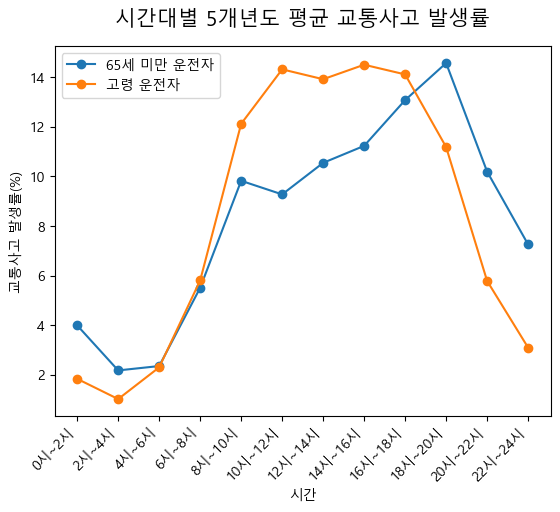

In [63]:
plt.title("시간대별 5개년도 평균 교통사고 발생률", size=15, pad=15)
plt.xlabel("시간")
plt.ylabel("교통사고 발생률(%)")

plt.plot(traffic_accident_time_df.loc["65-"], marker="o", label="65세 미만 운전자")
plt.plot(traffic_accident_time_df.loc["65+"], marker="o", label="고령 운전자")
plt.xticks(rotation=45, ha="right")
plt.legend(loc="best")
plt.savefig("./result/traffic_accident_time.png", bbox_inches="tight")